In [2]:
import pandas as pd # Data processing
import numpy as np # Linear Algebra
import seaborn as sns # Plotting data
import statsmodels # Regressions
import matplotlib.pyplot as plt # Displaying plots

# Happiness Data

https://www.kaggle.com/datasets/unsdsn/world-happiness

## Context

The World Happiness Report is a landmark survey of the state of global happiness. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [5]:
# Reading in the world happiness report for 2017 csv file into our python program
happy2015 = pd.read_csv("WorldHappinessReport/2015.csv")

# Initial viewing of dataset.
print("Columns in 2015 dataset:")
for col in happy2015.columns:
    print(col)
print(happy2015.head())
print(happy2015.tail())

Columns in 2015 dataset:
Country
Region
Happiness Rank
Happiness Score
Standard Error
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Gover

In [6]:
# Checking for null values
null_counts = happy2015.isnull().sum()
print("Number of null values within each column:")
print(null_counts)

Number of null values within each column:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [7]:
# Basic descriptive analysis
happy2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Analysis

## Where are we the Happiest?

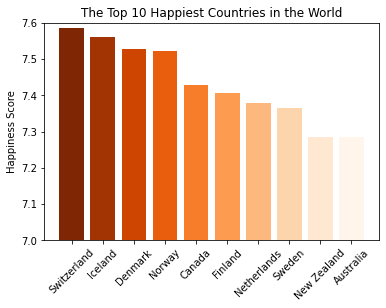

<Figure size 432x288 with 0 Axes>

In [9]:
cmap_o = plt.cm.get_cmap('Oranges_r', 10)

plt.bar(range(10), happy2015["Happiness Score"][happy2015["Happiness Rank"] <= 10], color=[cmap_o(i) for i in range(10)])

ax = plt.subplot()
ax.set_xticks(range(10))
ax.set_xticklabels(happy2015["Country"][happy2015["Happiness Rank"] <= 10])
plt.ylim(7.0,7.6)
plt.xticks(rotation = 45)

plt.title("The Top 10 Happiest Countries in the World")
plt.ylabel("Happiness Score")

plt.show()
plt.clf()

**Results**

We can spot a pattern of the happiest counties being well-developed nations with mostly artic environments. Eight of the top ten countries are located in the northern hemisphere's high latitudes. It is surprising that places with little sunlight and harsh living conditions are home to the happiest people. 

## Where are we the least happy?

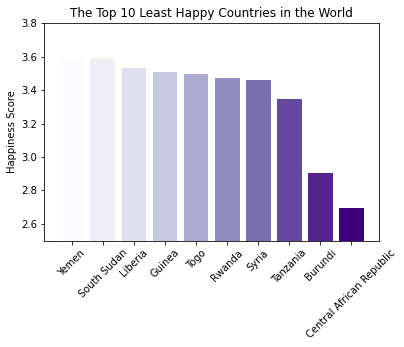

<Figure size 432x288 with 0 Axes>

In [27]:
cmap_p = plt.cm.get_cmap('Purples', 10)

plt.bar(range(10), happy2017["Happiness.Score"][happy2017["Happiness.Rank"] > (len(happy2017) - 10)], color=[cmap_p(i) for i in range(10)])

ax = plt.subplot()
ax.set_xticks(range(10))
ax.set_xticklabels(happy2017["Country"][happy2017["Happiness.Rank"] > (len(happy2017) - 10)])
plt.ylim(2.5, 3.8)
plt.xticks(rotation = 45)

plt.title("The Top 10 Least Happy Countries in the World")
plt.ylabel("Happiness Score")

plt.show()
plt.clf()

**Results**

The countries characterized as the least happy are often plagued by conflict, political instability, and economic hardship. These challenges typically coincide with inadequate healthcare systems, pronounced social inequalities, and humanitarian crises. Many of these nations are situated in Africa and the Middle East, regions known for their hot, arid climates or dense jungle environments. 

## What makes us happy?

### Economic GDP per Capita

Based on our top ten happiest countries, we noticed that each had an above average GDP. Let's look at the correlation between happiness and economic health.

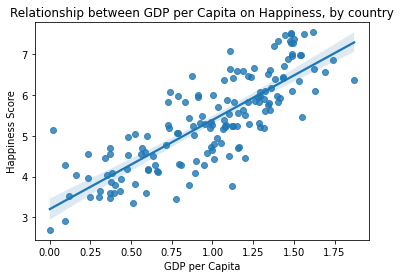

Correlation: 0.8124687538866412


<Figure size 432x288 with 0 Axes>

In [28]:
sns.regplot(x = "Economy..GDP.per.Capita.", y = "Happiness.Score", data = happy2017)

ax = plt.subplot()

ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Happiness Score")

plt.title("Relationship between GDP per Capita on Happiness, by country")

plt.show()
plt.clf()

economy_correlation = happy2017["Economy..GDP.per.Capita."].corr(happy2017['Happiness.Score'])

print("Correlation:", economy_correlation)

**Results**

Based on the scatterplot, we can see that there is a strong positive correlation between countries GDP per capita and the corresponding happiness score. The robust results can led one to believe that a healthier economy implies a happier population. However, it's important to note that correlation does not imply causation, and various other factors could contribute to overall happiness levels within each country. Further analysis and consideration of additional variables are necessary to better understand the complex relationship between economics and happiness.

## Family first

The family score is determined solely by survey responses to questions regarding the closeness individuals feel to their family members. It assesses the strength of familial bonds and relationships by gauging the emotional connectedness and proximity individuals perceive with their family members.

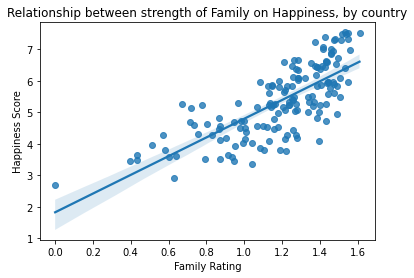

Correlation: 0.7527366726961485


<Figure size 432x288 with 0 Axes>

In [29]:
sns.regplot(x = "Family", y = "Happiness.Score", data = happy2017)

ax = plt.subplot()

ax.set_xlabel("Family Rating")
ax.set_ylabel("Happiness Score")

plt.title("Relationship between strength of Family on Happiness, by country")

plt.show()
plt.clf()

family_correlation = happy2017["Family"].corr(happy2017['Happiness.Score'])

print("Correlation:", family_correlation)

**Results**

The scatter plot and regression line suggest a positive correlation between family strength and happiness score among countries in the dataset. As the rating for family support and cohesion increases, there appears to be a tendency for higher happiness scores.

## Health and Happiness

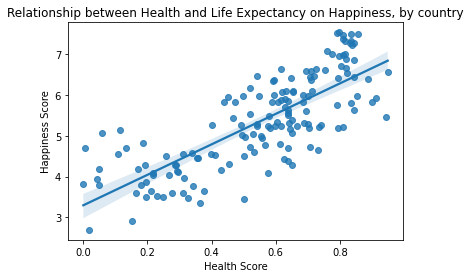

Correlation: 0.7819506247990085


<Figure size 432x288 with 0 Axes>

In [30]:
sns.regplot(x = "Health..Life.Expectancy.", y = "Happiness.Score", data = happy2017)

ax = plt.subplot()

ax.set_xlabel("Health Score")
ax.set_ylabel("Happiness Score")

plt.title("Relationship between Health and Life Expectancy on Happiness, by country")

plt.show()
plt.clf()

health_correlation = happy2017["Health..Life.Expectancy."].corr(happy2017['Happiness.Score'])

print("Correlation:", health_correlation)

**Results**

The scatter plot and regression line depict a discernible positive correlation between health, specifically life expectancy, and happiness scores across countries in the dataset. Countries with higher life expectancy tend to exhibit higher happiness scores on average. This observation suggests that individuals' perceptions of their overall happiness tend to be positively influenced by their expectations for a healthy and longer life. 

## Liberty for all

The liberty score evaluates the degree of freedom and autonomy individuals experience within their societies. It encompasses various indicators related to civil liberties, political rights, and individual freedoms, providing insight into the level of personal agency and empowerment within a given population.

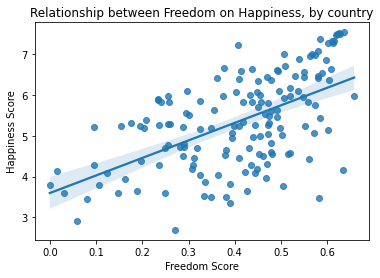

Correlation: 0.570137193597507


<Figure size 432x288 with 0 Axes>

In [31]:
sns.regplot(x = "Freedom", y = "Happiness.Score", data = happy2017)

ax = plt.subplot()

ax.set_xlabel("Freedom Score")
ax.set_ylabel("Happiness Score")

plt.title("Relationship between Freedom on Happiness, by country")

plt.show()
plt.clf()

freedom_correlation = happy2017['Freedom'].corr(happy2017['Happiness.Score'])

print("Correlation:", freedom_correlation)

**Results**

The scatter plot and regression line illustrate a loose positive correlation between freedom and happiness scores among countries in the dataset. Generally, countries where individuals report higher levels of perceived freedom tend to have slightly higher happiness scores. This suggests that a sense of personal freedom and autonomy may contribute to overall happiness. 

## Sharing is caring

The generosity score serves as a metric that measures the extent to which individuals donate money to charities. It quantifies the level of financial contributions made by people towards charitable causes, reflecting their willingness to share resources and support initiatives aimed at addressing various societal needs.

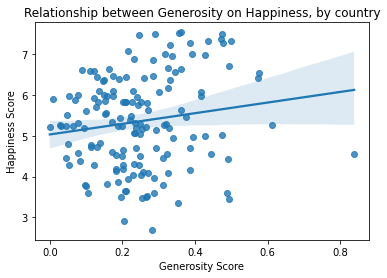

Correlation: 0.15525583911274465


<Figure size 432x288 with 0 Axes>

In [32]:
sns.regplot(x = "Generosity", y = "Happiness.Score", data = happy2017)

ax = plt.subplot()

ax.set_xlabel("Generosity Score")
ax.set_ylabel("Happiness Score")

plt.title("Relationship between Generosity on Happiness, by country")

plt.show()
plt.clf()

generosity_correlation = happy2017['Generosity'].corr(happy2017['Happiness.Score'])

print("Correlation:", generosity_correlation)

**Results**

The correlation coefficient between generosity and happiness scores, as calculated from the plot and dataset, is 0.15. This suggests a weak positive correlation between the two variables. While there appears to be some degree of association, it is relatively low, indicating that higher levels of reported generosity are only modestly linked to increased happiness scores among countries in the dataset.

## Greed is a Bottomless Pit

In this context, a high trust score indicates that the nation's government is perceived to have low levels of corruption, while a low trust score suggests the opposite. It serves as a measure of the level of confidence and faith that citizens have in their government's integrity and transparency.

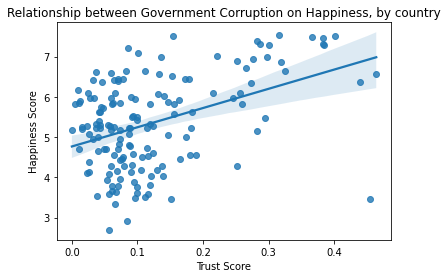

Correlation: 0.4290797372221718


<Figure size 432x288 with 0 Axes>

In [33]:
sns.regplot(x = "Trust..Government.Corruption.", y = "Happiness.Score", data = happy2017)

ax = plt.subplot()

ax.set_xlabel("Trust Score")
ax.set_ylabel("Happiness Score")

plt.title("Relationship between Government Corruption on Happiness, by country")

plt.show()
plt.clf()

trust_correlation = happy2017['Trust..Government.Corruption.'].corr(happy2017['Happiness.Score'])

print("Correlation:", trust_correlation)

**Results**

The plot depicting the relationship between government corruption and happiness scores among countries in the dataset appears to exhibit a non-robust pattern. Despite visualizing a potential trend, it's crucial to note that the correlation coefficient between government corruption and happiness scores is 0.42, indicating a moderate positive correlation. However, this correlation suggests a connection between lower levels of perceived government corruption and higher happiness scores, but the relationship is not strong.

## Strongest Attributes

To determine which factor is most likely associated with happiness worldwide, let's compare the perspective correlation scores.

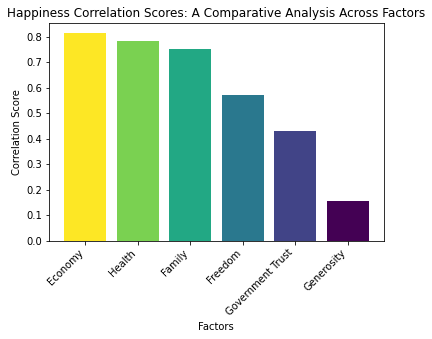

<Figure size 432x288 with 0 Axes>

In [40]:
correlation_scores = [economy_correlation, family_correlation, health_correlation, freedom_correlation, generosity_correlation, trust_correlation]
correlation_labels = ["Economy", "Family", "Health", "Freedom", "Generosity", "Government Trust"]

cmap_v = plt.cm.get_cmap('viridis_r', len(correlation_scores))

# Sort correlation scores and labels in descending order
sorted_scores, sorted_labels = zip(*sorted(zip(correlation_scores, correlation_labels), reverse=True))

# Create the bar chart with sorted data
plt.bar(range(len(sorted_scores)), sorted_scores, align='center', color=[cmap_v(i) for i in range(len(correlation_scores))])
plt.xticks(range(len(sorted_scores)), sorted_labels, rotation=45, ha='right')

plt.title("Happiness Correlation Scores: A Comparative Analysis Across Factors")
plt.ylabel("Correlation Score")
plt.xlabel("Factors")

plt.show()
plt.clf()

**Results**

The analysis revealed varying degrees of correlation between factors and overall happiness. Economy, health, family, freedom, trust, and generosity were assessed in relation to their impact on happiness, with correlation scores calculated accordingly.

Economy emerged as the factor exhibiting the strongest correlation with happiness, indicating a significant association between economic prosperity and overall well-being. This finding underscores the pivotal role of economic stability in shaping individuals' happiness levels.

Health followed closely behind economy in terms of correlation, highlighting the crucial link between health outcomes and subjective happiness. Individuals' physical and mental well-being emerged as key determinants of their overall life satisfaction.

Family relationships demonstrated a moderate correlation with happiness, suggesting that the quality of familial connections contributes positively to individuals' subjective sense of well-being. Strong family bonds and support systems were found to enhance overall happiness levels.

Freedom, as a measure of civil liberties and individual autonomy, exhibited a notable but slightly weaker correlation with happiness compared to family relationships. This finding underscores the importance of personal freedoms and self-determination in fostering subjective well-being.

Trust in government institutions emerged as a significant factor influencing happiness levels, albeit with a lower correlation compared to family and freedom. Perceptions of governmental transparency and integrity were found to contribute positively to overall happiness.

Generosity displayed the lowest correlation with happiness among the factors examined, indicating that while acts of generosity and altruism may enhance societal well-being, they exert a comparatively weaker direct influence on individual happiness levels.

In summary, the results suggest that while various factors contribute to overall happiness, economic stability, health, family relationships, personal freedoms, and governmental trust emerge as primary influencers of subjective well-being, with generosity playing a lesser role in comparison.